In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

# utils
def load_array(file):
    array = np.fromfile(file, dtype=np.int16)
    return reshape_array(array)

def reshape_array(array):
    # reshape  3 types
    if array.size == 3750000:
        array = np.reshape(array, (1500, 2500))

    elif array.size == 15000000:
        array = np.reshape(array, (3000, 5000))

    else:
        array = np.reshape(array, (6000, 10000))

    return array

def load(band, t):
    file = os.listdir('data/bin_4obs')[(band - 1) * 4 + t]
    return load_array('data/bin_4obs/' + file)

def show(array):
    fig = plt.figure(figsize=(10,10),dpi=200)
    ax1 = fig.add_subplot(2,1,1)
    ax1.imshow(array)
    
def show_diff(array):
    fig = plt.figure(figsize=(10,10),dpi=200)
    ax1 = fig.add_subplot(2,1,1)
    ax1.imshow(array, cmap=plt.get_cmap('seismic'))    

def hist(array):
    hist = np.histogram(array, bins=256)
    fig = plt.figure(figsize=(10,10),dpi=200)
    ax1 = fig.add_subplot(2,1,1)
    ax1.bar(np.arange(256), hist[0])
    print(array.min(), array.max())

In [6]:
array = load(1, 0)

75 1022


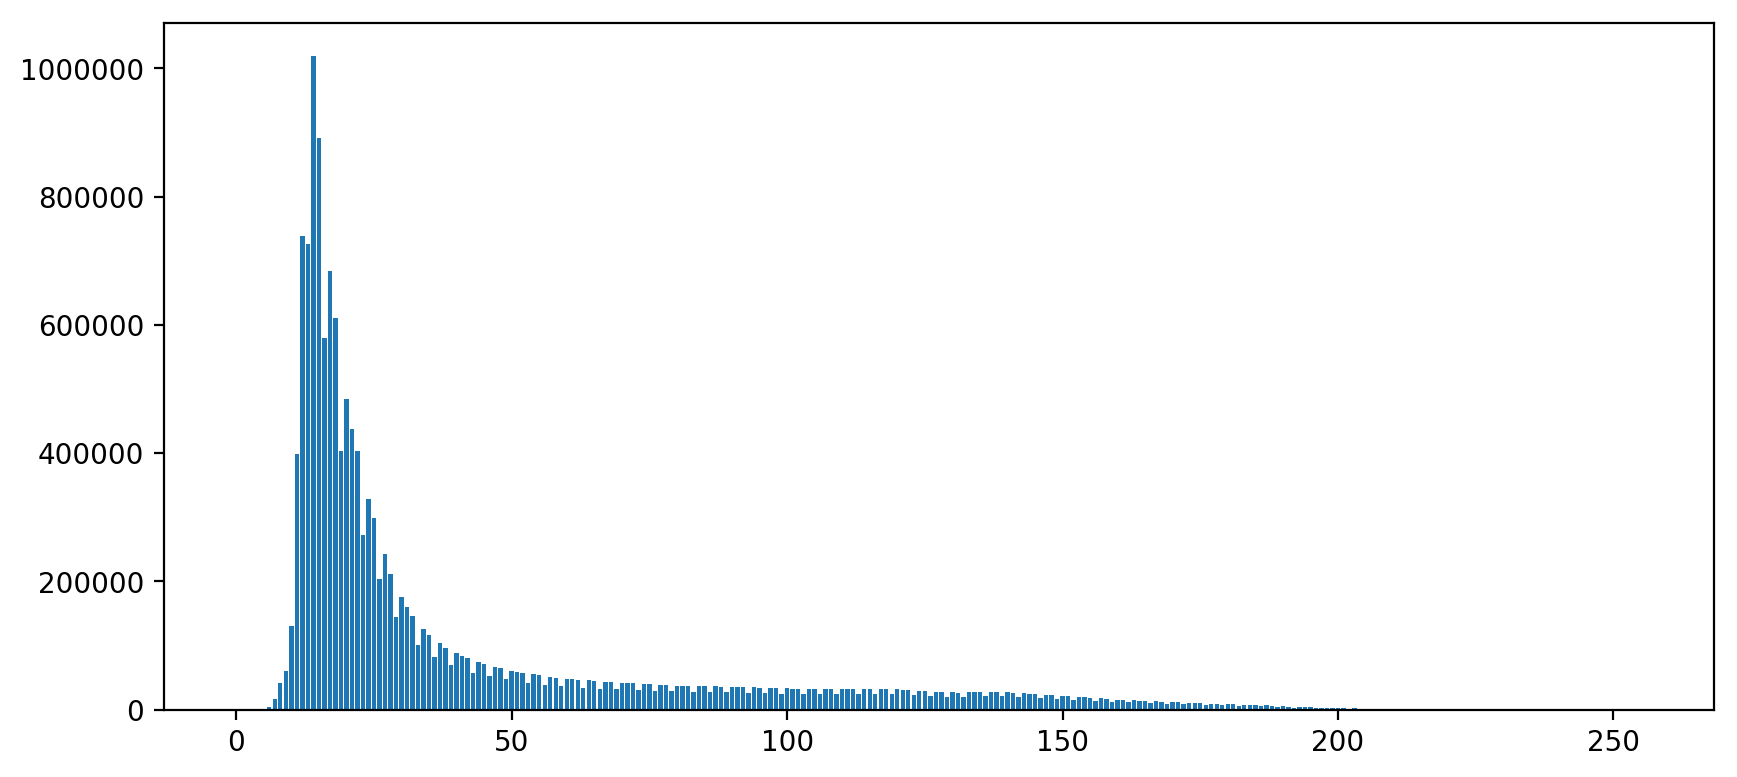

In [45]:
hist(array)

In [60]:
hist_all = np.histogram(array, bins=256*256)

In [69]:
len(np.where(hist_all[0][75:1022] == 0)[0])

936

In [72]:
hist_all

(array([1, 0, 0, ..., 0, 0, 2]),
 array([   75.        ,    75.01445007,    75.02890015, ...,  1021.97109985,
         1021.98554993,  1022.        ]))

In [68]:
print(np.where(hist_all[0] == 0)[0][:100])

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


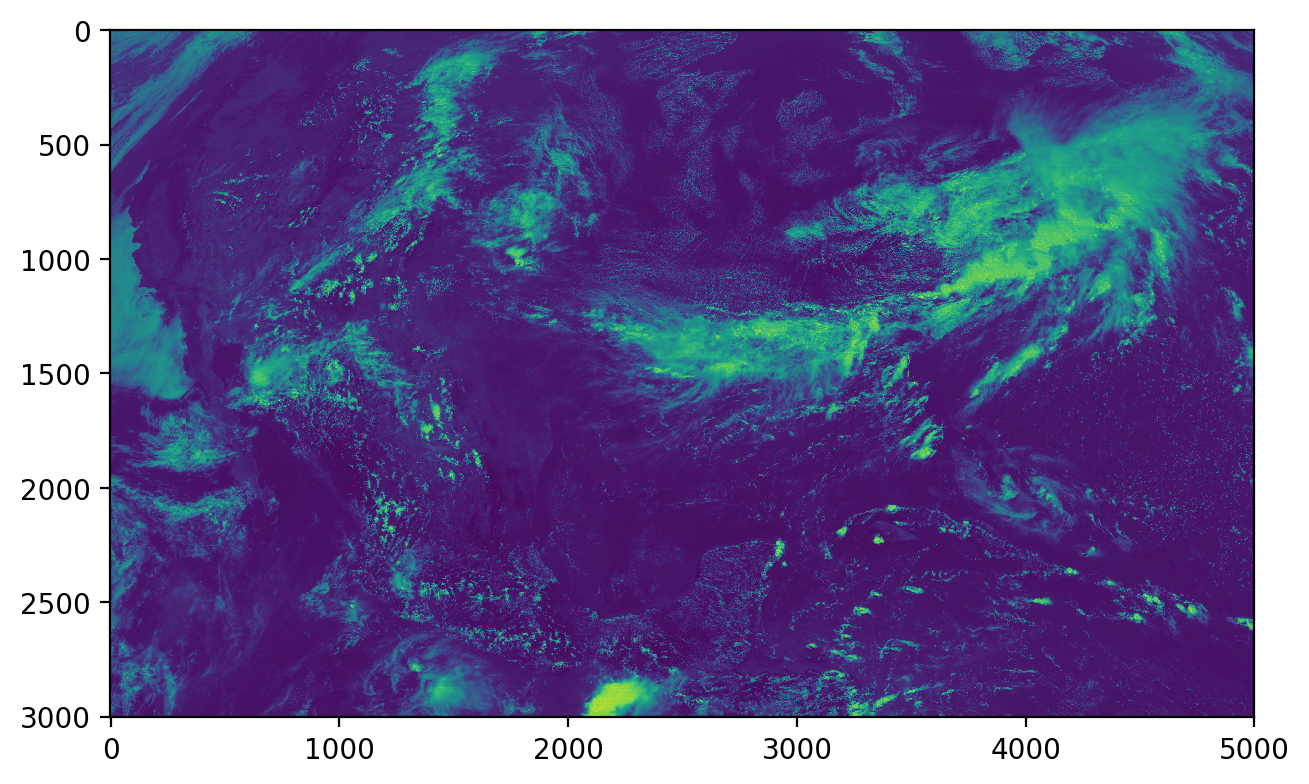

In [16]:
show(array)

# filter UP
numpyで一番簡単

In [47]:
def delta_array(array):
    down = np.roll(array, 1, axis=0)
    down[0, :] = 0
    delta = array - down + 128

    return delta

In [49]:
delta = delta_array(array)

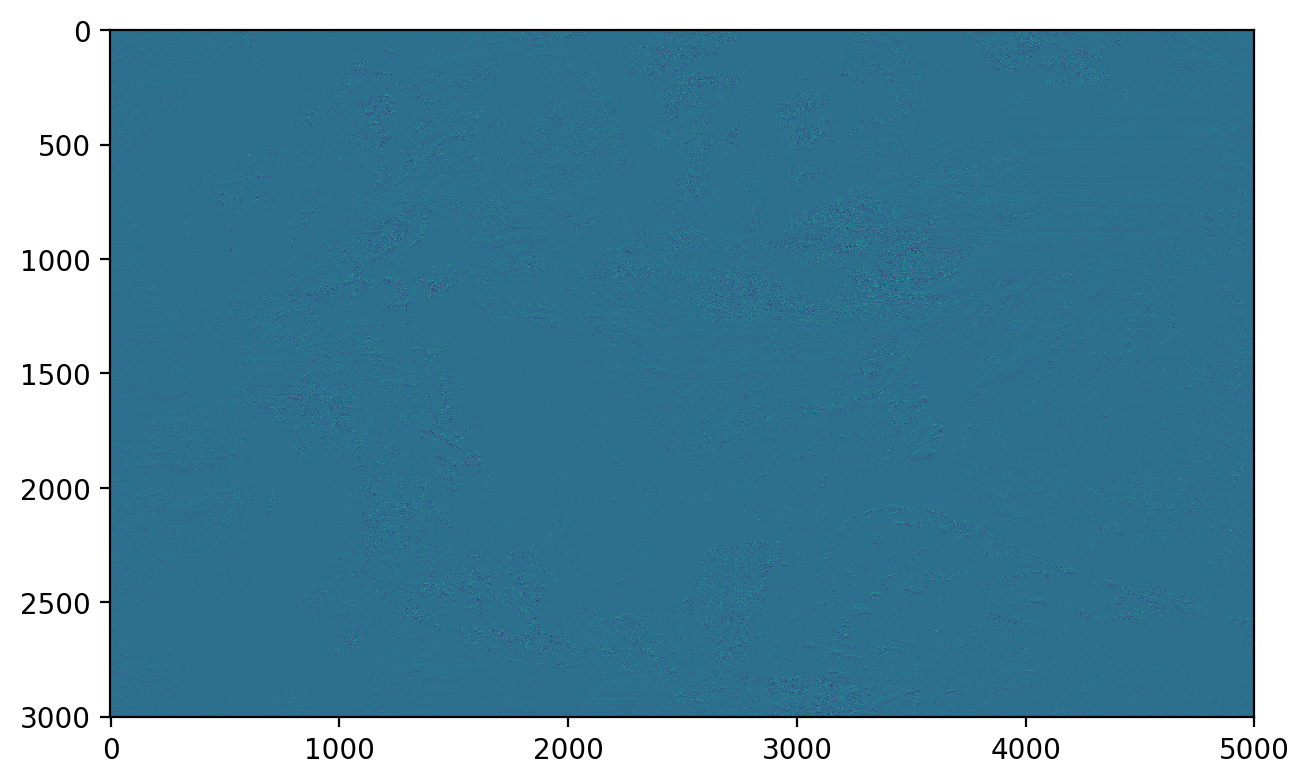

In [51]:
show(delta)

-324 908


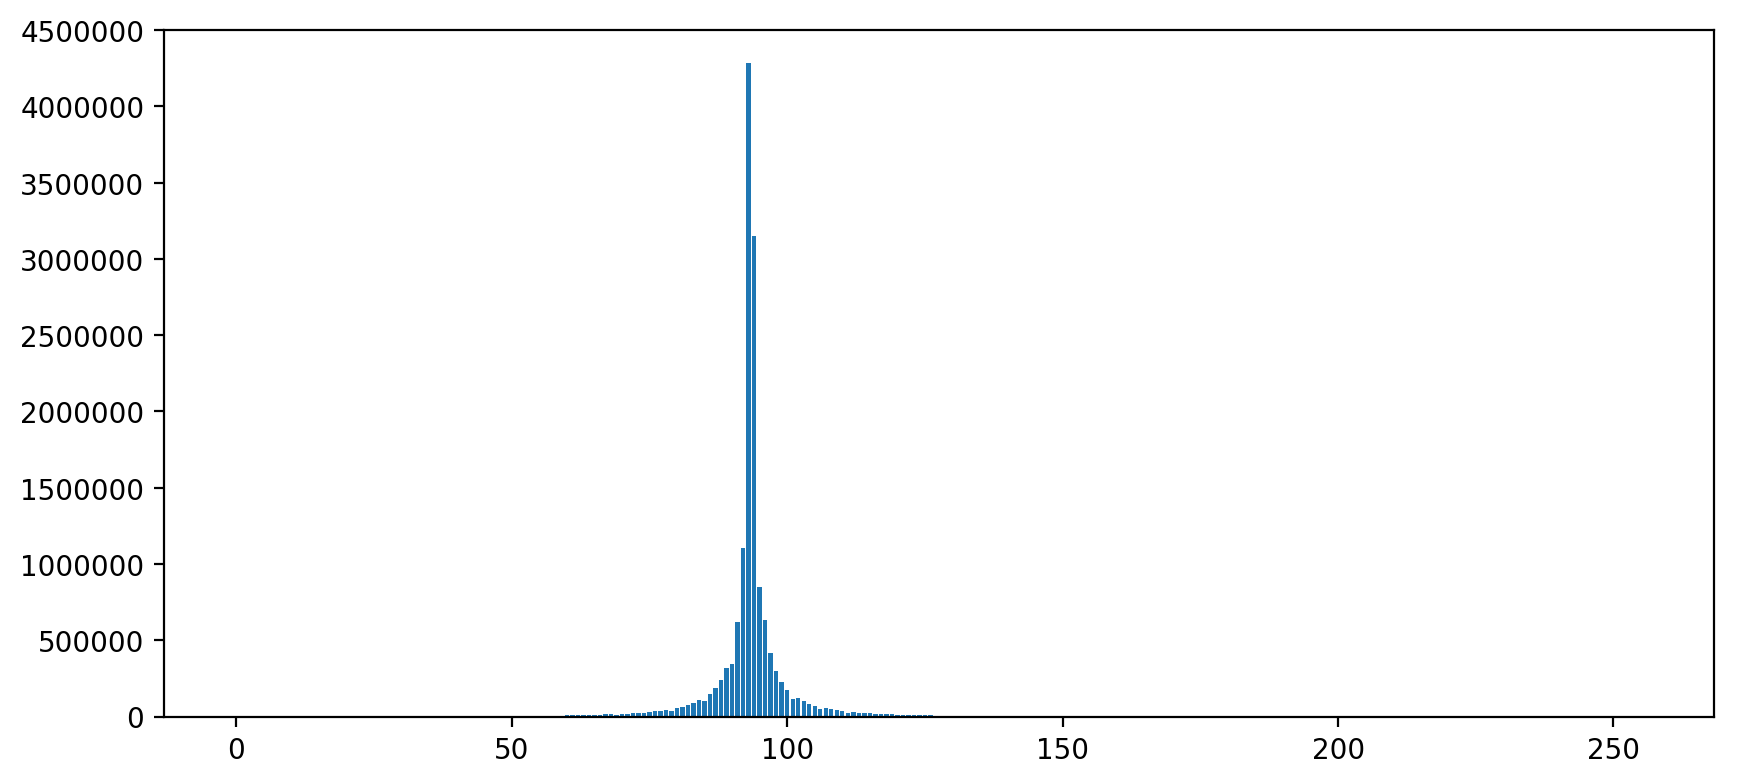

In [52]:
hist(delta)

# 16bitを符号化
上位8bitと下位8bitに分割

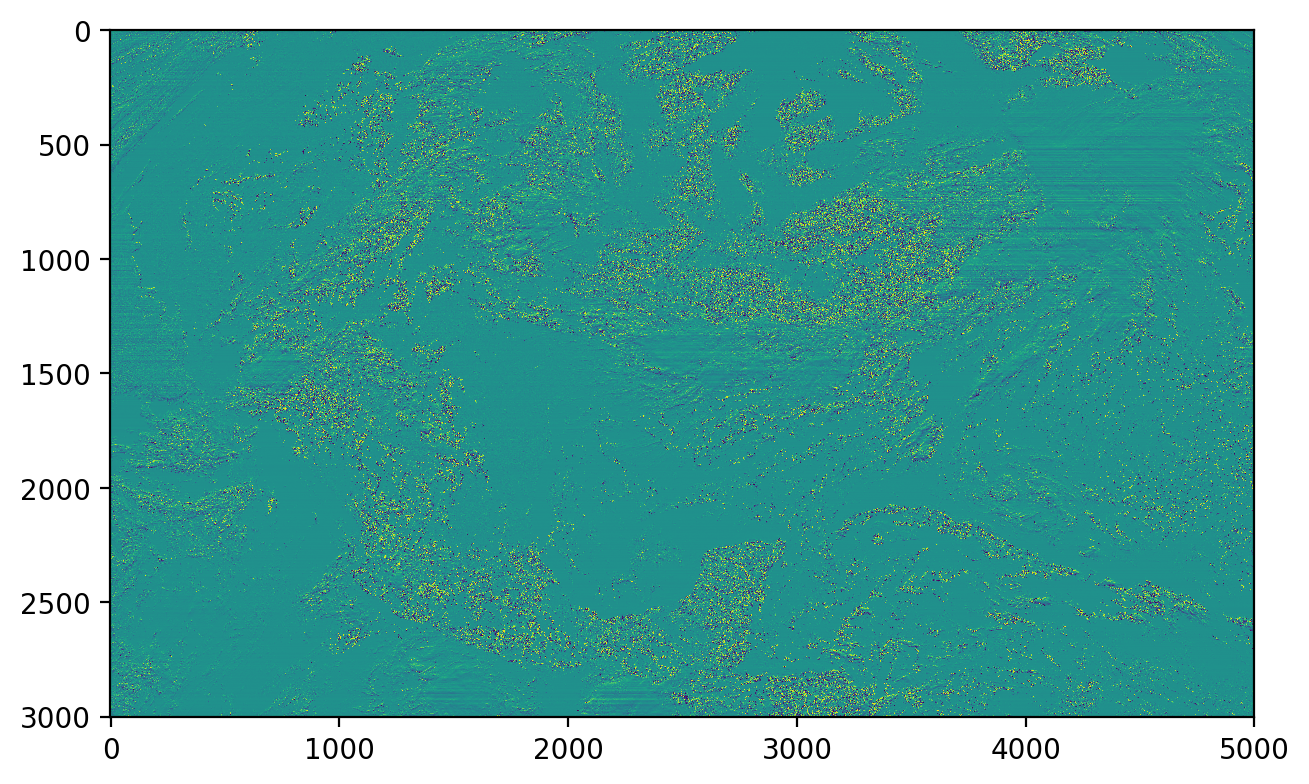

In [55]:
delta1 = delta.astype(np.uint8)
show(delta1)

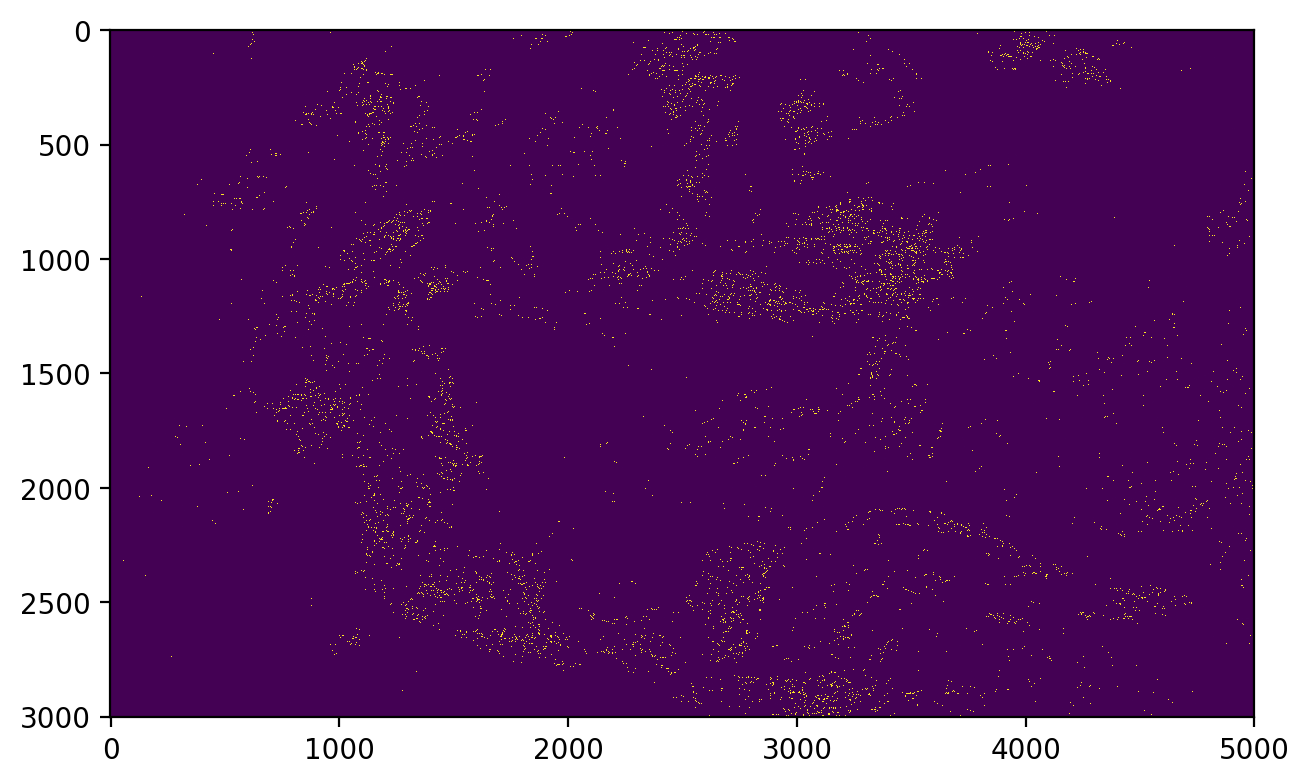

In [56]:
delta2 = np.right_shift(delta, 8).astype(np.uint8)
show(delta2)

0 255


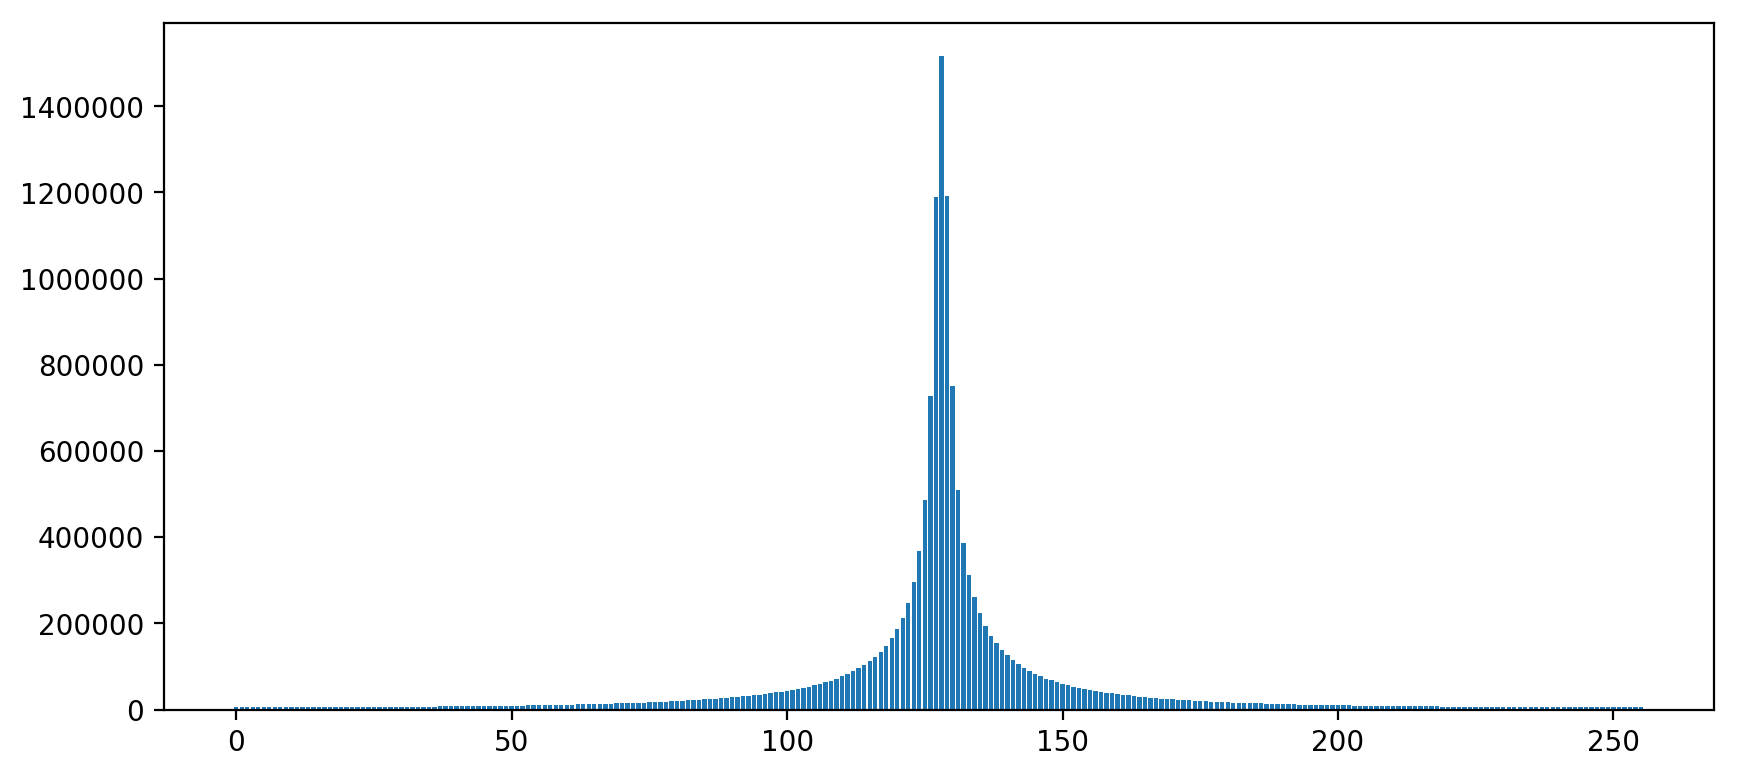

In [57]:
hist(delta1)

0 255


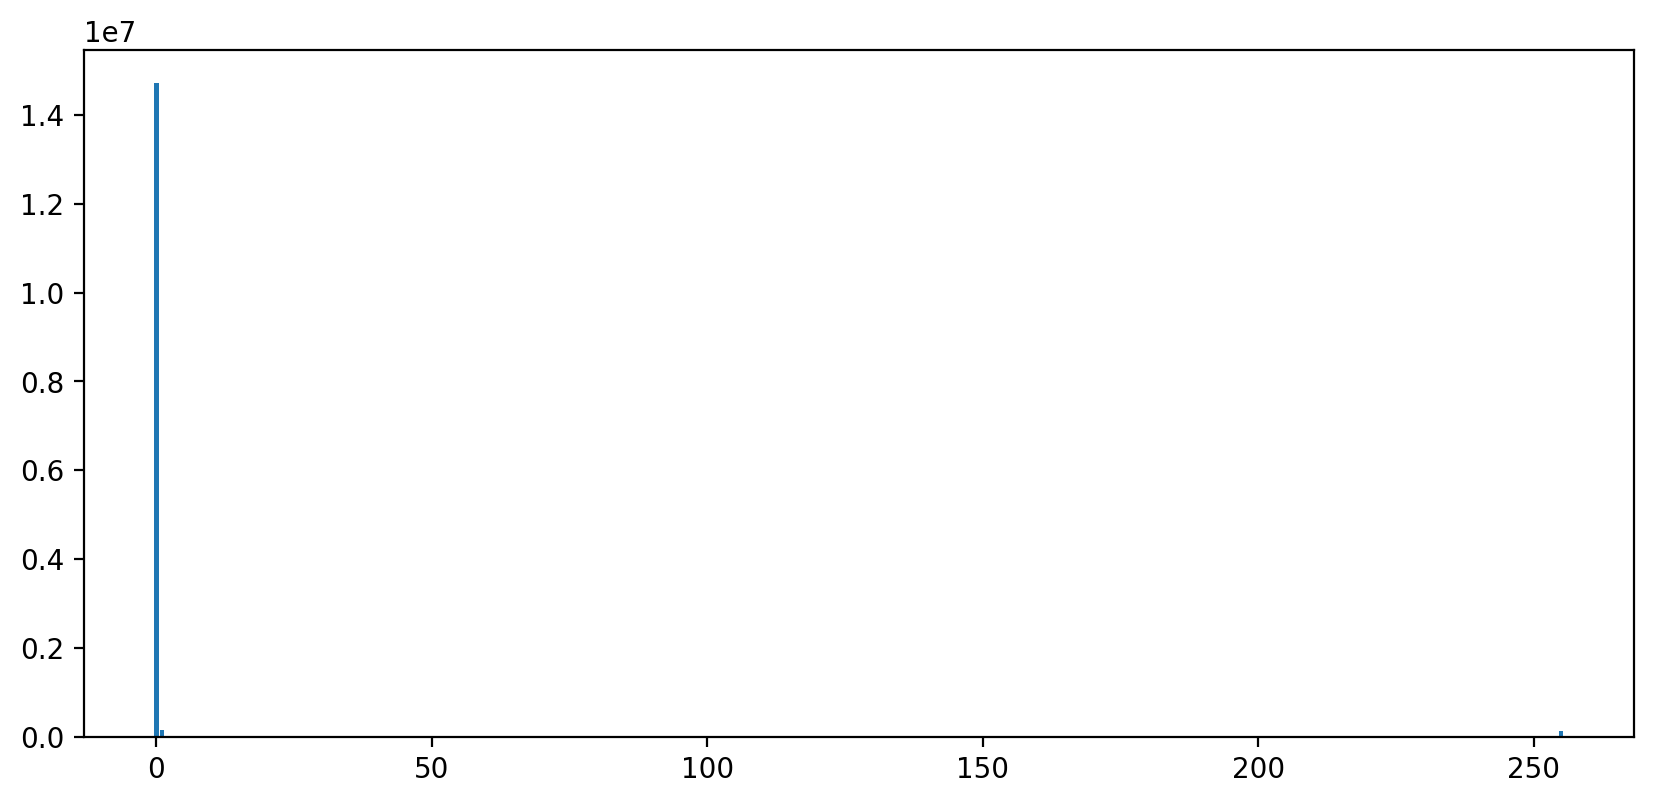

In [58]:
hist(delta2)